In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold

result_87 = pd.read_csv('result_aula_87.csv')
result_141 = pd.read_csv('result_aula_141.csv')
result_143 = pd.read_csv('result_aula_143.csv')
result_92 = pd.read_csv('result_aula_92.csv')

Procesando archivo: result_aula_87.csv
Aciertos para Linear Regression: 21/23 (91.30%)
Aciertos para Ridge: 21/23 (91.30%)
Aciertos para Lasso: 21/23 (91.30%)
Aciertos para Decision Tree: 20/23 (86.96%)
Aciertos para Random Forest: 19/23 (82.61%)
Métricas en el conjunto de prueba:
Modelo: Linear Regression
MSE: 3.68563887728986
R2: 0.664415677430868

Modelo: Ridge
MSE: 3.664263951393859
R2: 0.666361904466559

Modelo: Lasso
MSE: 5.903568426234431
R2: 0.46246903806398354

Modelo: Decision Tree
MSE: 4.413043478260869
R2: 0.5981841261645044

Modelo: Random Forest
MSE: 2.766813858695652
R2: 0.7480764162309861



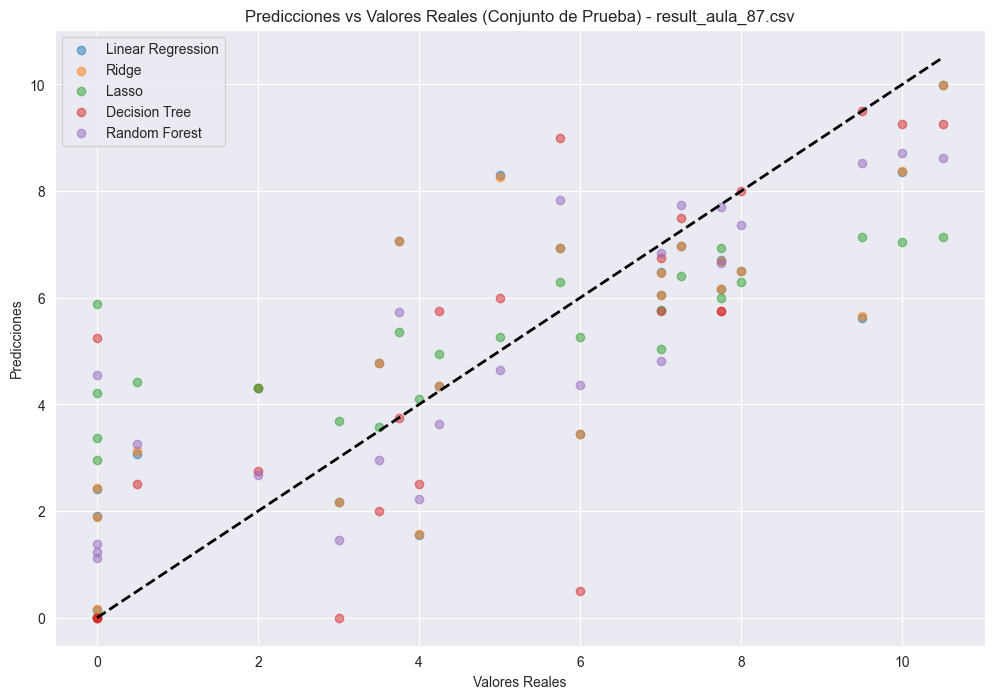

Procesando archivo: result_aula_143.csv
Aciertos para Linear Regression: 39/47 (82.98%)
Aciertos para Ridge: 40/47 (85.11%)
Aciertos para Lasso: 38/47 (80.85%)
Aciertos para Decision Tree: 36/47 (76.60%)
Aciertos para Random Forest: 39/47 (82.98%)
Métricas en el conjunto de prueba:
Modelo: Linear Regression
MSE: 12.015507574224271
R2: -0.8412307671187178

Modelo: Ridge
MSE: 10.635602941144507
R2: -0.6297771226995259

Modelo: Lasso
MSE: 4.77353643282899
R2: 0.26851345281979866

Modelo: Decision Tree
MSE: 5.661640425531917
R2: 0.13242229015652063

Modelo: Random Forest
MSE: 2.674569204680851
R2: 0.5901547164756749



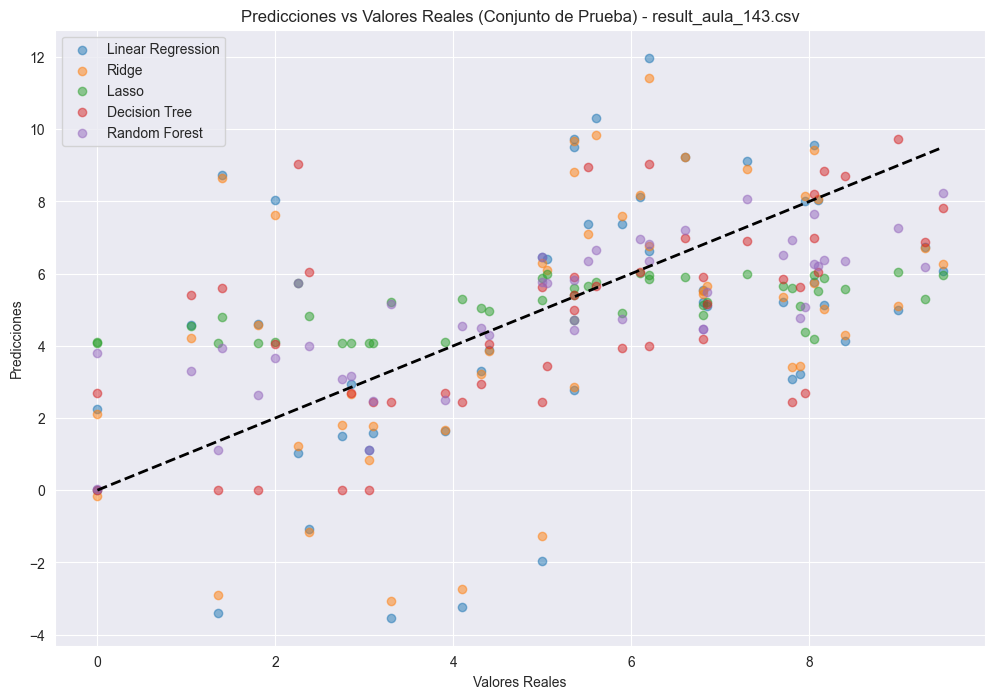

Procesando archivo: result_aula_92.csv
Aciertos para Linear Regression: 27/51 (52.94%)
Aciertos para Ridge: 28/51 (54.90%)
Aciertos para Lasso: 41/51 (80.39%)
Aciertos para Decision Tree: 35/51 (68.63%)
Aciertos para Random Forest: 41/51 (80.39%)
Métricas en el conjunto de prueba:
Modelo: Linear Regression
MSE: 14.13916244624357
R2: -1.3851841309258055

Modelo: Ridge
MSE: 13.148715263924084
R2: -1.2181021760525694

Modelo: Lasso
MSE: 4.975459263424471
R2: 0.16067259823153668

Modelo: Decision Tree
MSE: 9.757352941176471
R2: -0.646001556571651

Modelo: Random Forest
MSE: 3.952475980392157
R2: 0.3332431802704543



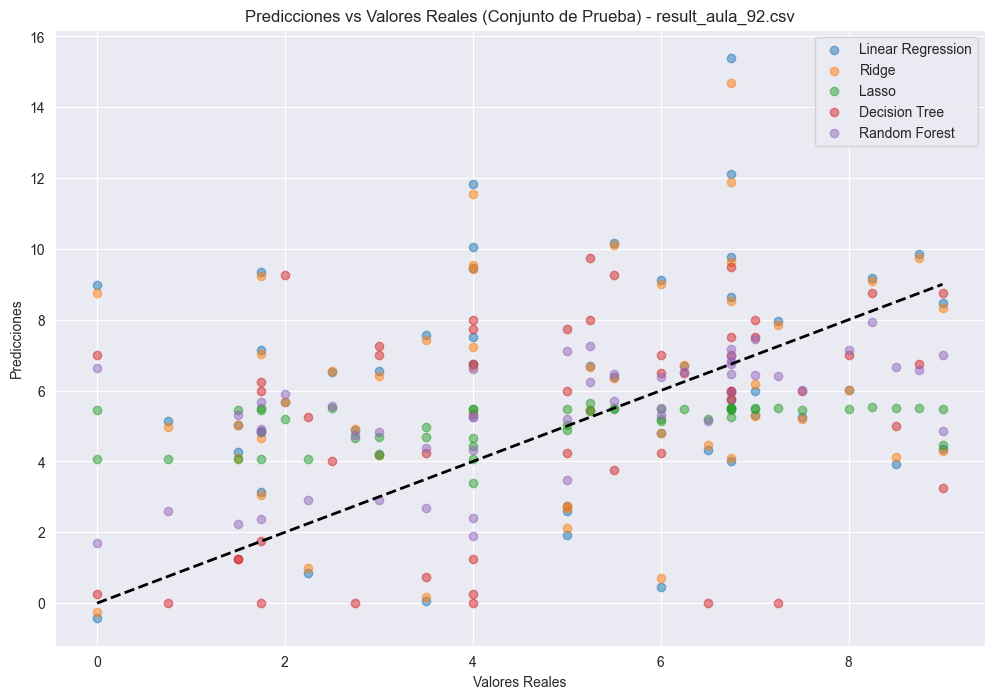

Procesando archivo: result_aula_141.csv
Aciertos para Linear Regression: 20/22 (90.91%)
Aciertos para Ridge: 20/22 (90.91%)
Aciertos para Lasso: 16/22 (72.73%)
Aciertos para Decision Tree: 18/22 (81.82%)
Aciertos para Random Forest: 14/22 (63.64%)
Métricas en el conjunto de prueba:
Modelo: Linear Regression
MSE: 3.0211723951467637
R2: 0.7001073259256039

Modelo: Ridge
MSE: 3.0181352833915542
R2: 0.7004088007991316

Modelo: Lasso
MSE: 6.607784484288993
R2: 0.3440870299609412

Modelo: Decision Tree
MSE: 10.982613636363636
R2: -0.09017458819162183

Modelo: Random Forest
MSE: 5.914439585454548
R2: 0.4129109925065153



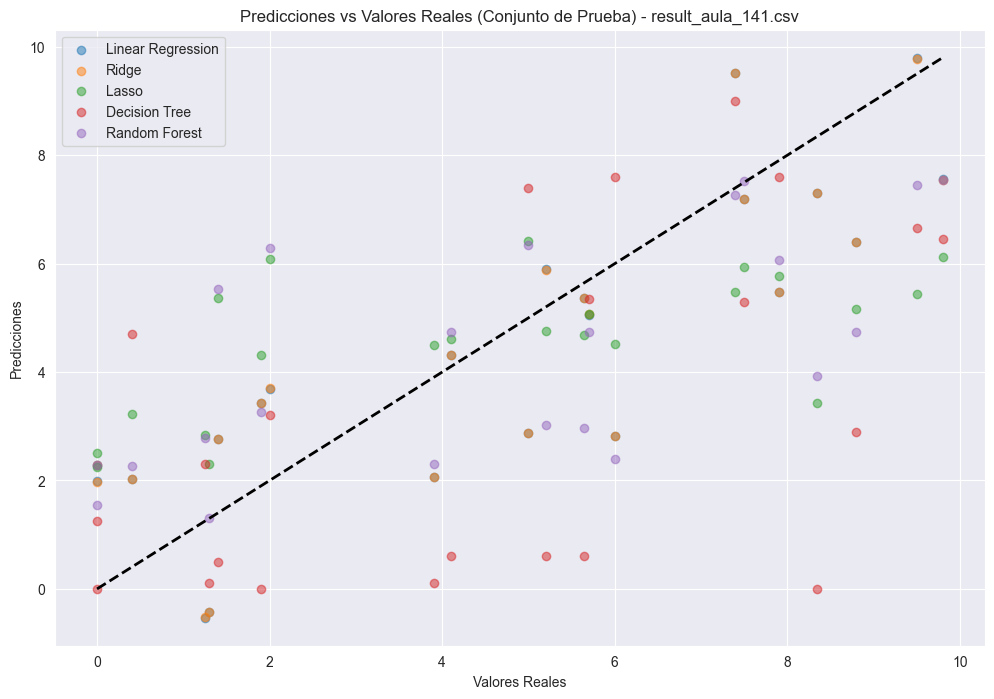

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

def procesar_resultado(file_path, tiene_p_grade=True):
    # Leer el archivo CSV
    data = pd.read_csv(file_path)

    # Extraer el userid, aula_id y F_Grade
    userids = data['userid']
    aula_ids = data['aula_id']
    y = data['F_Grade']

    # Extraer las características de las actividades
    activity_columns = [col for col in data.columns if col.startswith('grade_') or col.startswith('date_') or col.startswith('nevaluations_')]
    X = data[activity_columns]

    # Convertir las columnas de fechas a un formato numérico
    date_columns = [col for col in X.columns if col.startswith('date_')]
    for col in date_columns:
        X.loc[:, col] = pd.to_datetime(X[col]).astype('int64')

    # Combinar las características en un DataFrame
    if tiene_p_grade:
        p_grades = data['P_Grade']
        X_combined = pd.concat([userids, aula_ids, p_grades, X], axis=1)
    else:
        X_combined = pd.concat([userids, aula_ids, X], axis=1)

    return X_combined, y

# Lista de archivos y si tienen P_Grade
files = [
    ('result_aula_87.csv', True),
    ('result_aula_143.csv', False),
    ('result_aula_92.csv', False),
    ('result_aula_141.csv', True)
]

for file_path, tiene_p_grade in files:
    print(f"Procesando archivo: {file_path}")
    X, y = procesar_resultado(file_path, tiene_p_grade)

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

    # Escalar las características
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Definir los modelos de regresión
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge': Ridge(max_iter=10000),
        'Lasso': Lasso(max_iter=10000),
        'Decision Tree': DecisionTreeRegressor(),
        'Random Forest': RandomForestRegressor()
    }

    # Evaluar los modelos
    metrics_train = {}
    metrics_test = {}

    for name, model in models.items():
        # Ajustar el modelo
        model.fit(X_train_scaled, y_train)
        
        # Predicciones en el conjunto de entrenamiento
        y_train_pred = model.predict(X_train_scaled)
        mse_train = mean_squared_error(y_train, y_train_pred)
        r2_train = r2_score(y_train, y_train_pred)
        metrics_train[name] = {'MSE': mse_train, 'R2': r2_train}
        
        # Predicciones en el conjunto de prueba
        y_test_pred = model.predict(X_test_scaled)
        mse_test = mean_squared_error(y_test, y_test_pred)
        r2_test = r2_score(y_test, y_test_pred)
        metrics_test[name] = {'MSE': mse_test, 'R2': r2_test}
        
        
        # Prueba binaria succes rate aprobados o no
        
        umbral = 5.0
        y_test_pred = model.predict(X_test_scaled)
        y_test_pred_binary = (y_test_pred >= umbral).astype(int)
        y_test_binary = (y_test >= umbral).astype(int)
        aciertos = np.sum(y_test_pred_binary == y_test_binary)
        total = len(y_test)
        print(f"Aciertos para {name}: {aciertos}/{total} ({aciertos/total:.2%})")
    
    print("Métricas en el conjunto de prueba:")
    for name, metric in metrics_test.items():
        print(f"Modelo: {name}")
        print(f"MSE: {metric['MSE']}")
        print(f"R2: {metric['R2']}")
        print()

    # Graficar las predicciones de los modelos frente a los valores reales en el conjunto de prueba
    plt.figure(figsize=(12, 8))
    for name, model in models.items():
        y_test_pred = model.predict(X_test_scaled)
        plt.scatter(y_test, y_test_pred, alpha=0.5, label=name)

    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Valores Reales')
    plt.ylabel('Predicciones')
    plt.title(f'Predicciones vs Valores Reales (Conjunto de Prueba) - {file_path}')
    plt.legend()
    plt.show()

In [116]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def procesar_resultado(file_path, tiene_p_grade=True):
    # Leer el archivo CSV
    data = pd.read_csv(file_path)

    # Extraer el userid, aula_id y F_Grade
    userids = data['userid']
    aula_ids = data['aula_id']
    y = data['F_Grade']

    # Extraer las características de las actividades
    activity_columns = [col for col in data.columns if col.startswith('grade_') or col.startswith('date_') or col.startswith('nevaluations_')]
    X = data[activity_columns]

    # Convertir las columnas de fechas a un formato numérico
    date_columns = [col for col in X.columns if col.startswith('date_')]
    for col in date_columns:
        X.loc[:, col] = pd.to_datetime(X[col]).astype('int64')

    # Combinar las características en un DataFrame
    if tiene_p_grade:
        p_grades = data['P_Grade']
        X_combined = pd.concat([userids, aula_ids, p_grades, X], axis=1)
    else:
        X_combined = pd.concat([userids, aula_ids, X], axis=1)

    return X_combined, y

def obtener_importancia_features(file_path, tiene_p_grade=True):
    # Procesar los datos
    X, y = procesar_resultado(file_path, tiene_p_grade)

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

    # Escalar las características
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Entrenar el modelo RandomForestRegressor
    model = RandomForestRegressor()
    model.fit(X_train_scaled, y_train)

    # Obtener las importancias de las características
    importancias = model.feature_importances_

    # Crear un DataFrame para ordenar las características por importancia
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importancias
    })

    # Ordenar las características por importancia
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

    return feature_importance_df

# Ejemplo de uso


In [117]:



# Ejemplo de uso
file_path = 'result_aula_143.csv'
importancia_features = obtener_importancia_features(file_path, tiene_p_grade=True)

# Eliminar la columna P_Grade si está presente
if 'P_Grade' in importancia_features['Feature'].values:
    importancia_features = importancia_features[importancia_features['Feature'] != 'P_Grade']

# Obtener las 20 características más importantes
top_20_features = importancia_features.head(20)

# Cargar el archivo activitats.csv
activitats = pd.read_csv('activitats.csv', encoding='latin-1')

# Extraer el número de la actividad de las características
top_20_features.loc[:, 'Activity_Number'] = top_20_features['Feature'].str.extract(r'(\d+)').astype(int)

# Mapear los números de actividad a los nombres de las actividades
actividades_recomendadas = top_20_features.merge(activitats, left_on='Activity_Number', right_on='activitat_id')

# Mostrar las actividades recomendadas
print(actividades_recomendadas[['Feature', 'activitat_id', 'activitat']])

              Feature  activitat_id  \
0           date_2693          2693   
1           date_2688          2688   
2           date_2627          2627   
3           date_2682          2682   
4           date_2690          2690   
5           date_2703          2703   
6           date_2691          2691   
7           date_2668          2668   
8           date_2680          2680   
9           date_2657          2657   
10          date_2632          2632   
11          date_2608          2608   
12          date_2649          2649   
13          date_2683          2683   
14          date_2638          2638   
15          date_2696          2696   
16  nevaluations_2676          2676   
17          date_2677          2677   
18          date_2631          2631   
19          date_2629          2629   

                                            activitat  
0                      Problema 5b.17: PrimerDiferent  
1                     Problema 5b.2: Comparar cadenes  
2           

C:\Users\mique\AppData\Local\Temp\ipykernel_14160\1360549159.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20_features.loc[:, 'Activity_Number'] = top_20_features['Feature'].str.extract(r'(\d+)').astype(int)
